In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('data/split.txt', 'r') as file:
    record_ids = [line.strip() for line in file.readlines()]

In [8]:
records = []
for record_id in record_ids:
    record = {'record_id': record_id}
    unsteered_json_path = f'results/unsteered/boltz_results_yamls/predictions/{record_id}/energy_{record_id}_model_0.json'
    steered_json_path = f'results/steered/boltz_results_yamls/predictions/{record_id}/energy_{record_id}_model_0.json'
    with open(unsteered_json_path) as file:
        record.update({
            'unsteered_' + key: val
            for key, val in json.load(file).items()
        })
    with open(steered_json_path) as file:
        record.update({
            'steered_' + key: val
            for key, val in json.load(file).items()
        })
    records.append(record)
df = pd.DataFrame.from_records(records)
df['relative_diff_bond'] = (df['steered_bond'] - df['unsteered_bond']) / df['unsteered_bond']
df['relative_diff_angle'] = (df['steered_angle'] - df['unsteered_angle']) / df['unsteered_angle']
df['relative_diff_torsion'] = (df['steered_torsion'] - df['unsteered_torsion']) / df['unsteered_torsion']
df['relative_diff_bonded'] = (df['steered_bonded'] - df['unsteered_bonded']) / df['unsteered_bonded']
df[['relative_diff_bond', 'relative_diff_angle', 'relative_diff_torsion', 'relative_diff_bonded']].mean()

relative_diff_bond      -0.963256
relative_diff_angle     -0.726666
relative_diff_torsion   -0.073772
relative_diff_bonded    -0.420216
dtype: float64

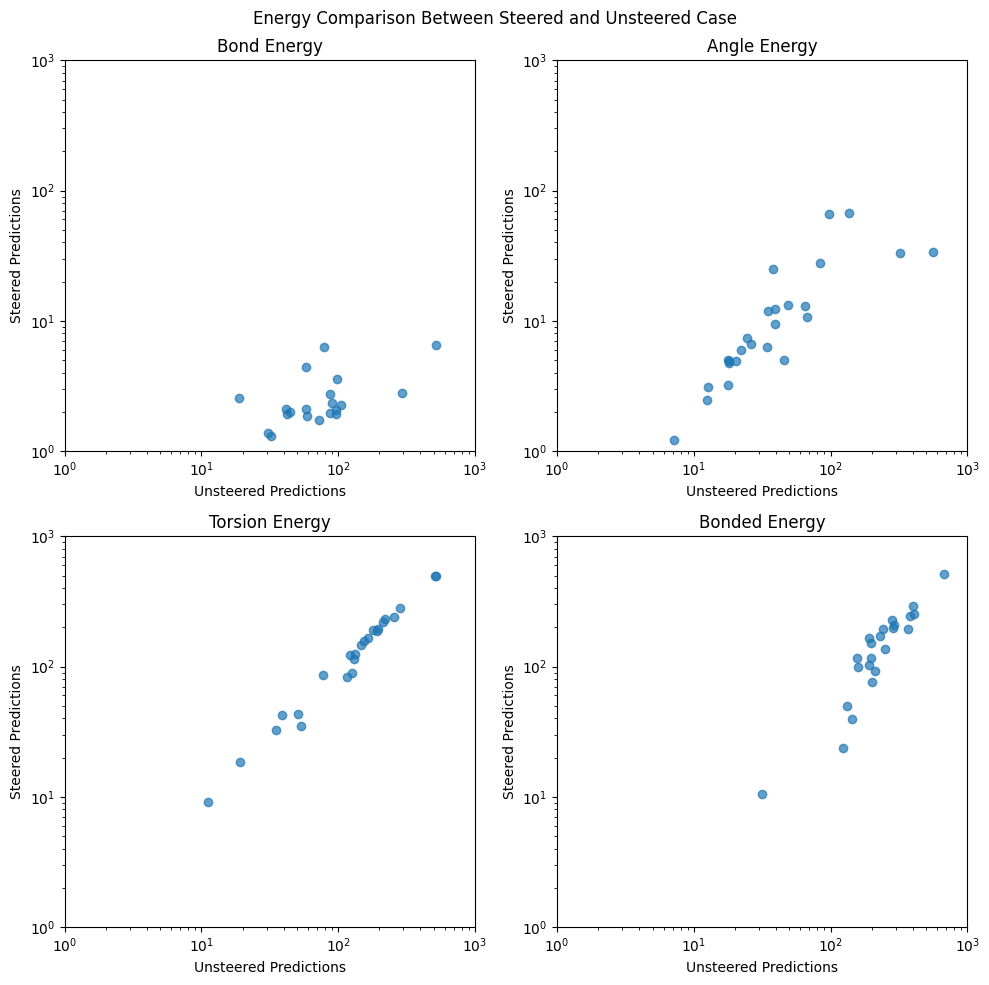

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plot_vars = ['bond', 'angle', 'torsion', 'bonded']
for i, var in enumerate(plot_vars):
    ax = axes[i // 2, i %2]
    ax.scatter(df[f'unsteered_{var}'], df[f'steered_{var}'], alpha=0.7)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Unsteered Predictions')
    ax.set_ylabel('Steered Predictions')
    ax.set_title(f'{var.capitalize()} Energy')
    ax.set_xlim(1, 1000)
    ax.set_ylim(1, 1000)
fig.suptitle('Energy Comparison Between Steered and Unsteered Case')
plt.tight_layout()
plt.show()